Nama : Alan Hermawan<br>
NIM : 211351010<br>
Kelas : Malam B

# import Dataset

In [ ]:
from google.colab import files
files.upload()

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d sujithmandala/obesity-classification-dataset

  0% 0.00/1.08k [00:00<?, ?B/s]
100% 1.08k/1.08k [00:00<00:00, 2.05MB/s]


In [4]:
!mkdir obesity
!unzip obesity-classification-dataset.zip -d obesity
!ls obesity

Archive:  obesity-classification-dataset.zip
  inflating: obesity/Obesity Classification.csv  
'Obesity Classification.csv'


# import library yang digunakan

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

import plotly.graph_objs as go
import plotly.offline as py
import pickle

from sklearn import neighbors
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Data Discovery

In [6]:
df = pd.read_csv('/content/obesity/Obesity Classification.csv')

In [7]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [8]:
df.shape

(108, 7)

In [9]:
df.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


In [10]:
df.isnull().sum().sort_values(ascending=False)

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [11]:
df.value_counts('Label')

Label
Underweight      47
Normal Weight    29
Overweight       20
Obese            12
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


# EDA (minimal 5)

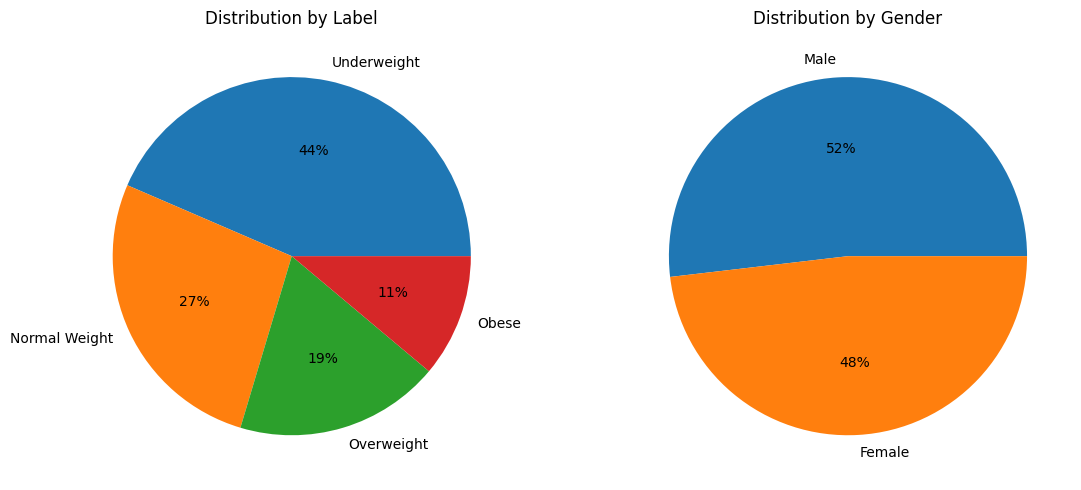

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].pie(df['Label'].value_counts(), labels=df['Label'].value_counts().index, autopct='%.0f%%')
axs[0].set_title('Distribution by Label')

axs[1].pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%.0f%%')
axs[1].set_title('Distribution by Gender')

plt.tight_layout()
plt.show()

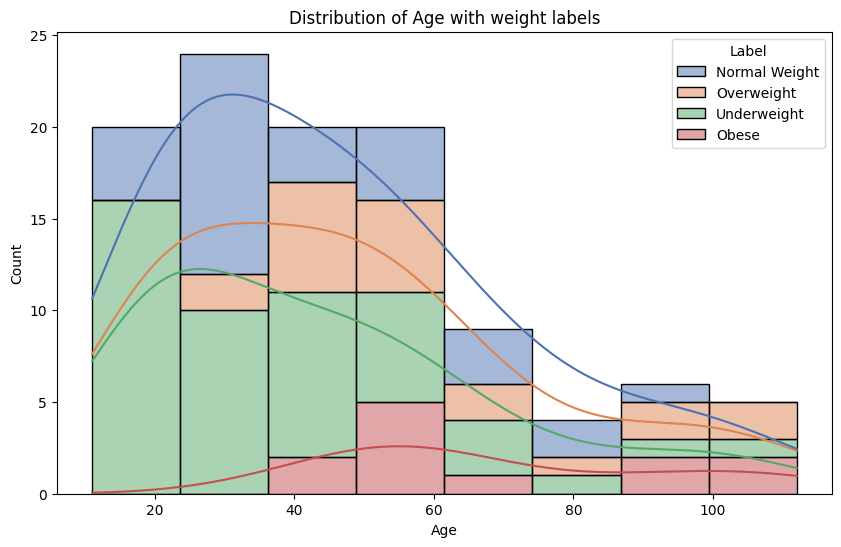

In [20]:
plt.figure(figsize=(10,6),dpi=100)
sns.histplot(data=df,x='Age',kde=True,hue='Label',multiple='stack',palette='deep')
plt.title('Distribution of Age with weight labels');

Semua penderita obesitas berusia 40 tahun ke atas.

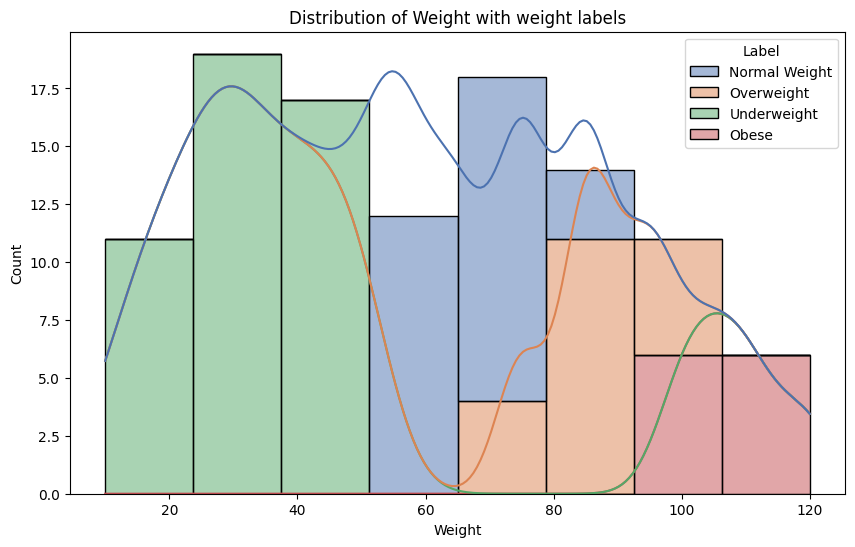

In [21]:
plt.figure(figsize=(10,6),dpi=100)
sns.histplot(data=df,x='Weight',kde=True,hue='Label',multiple='stack',palette='deep')
plt.title('Distribution of Weight with weight labels');

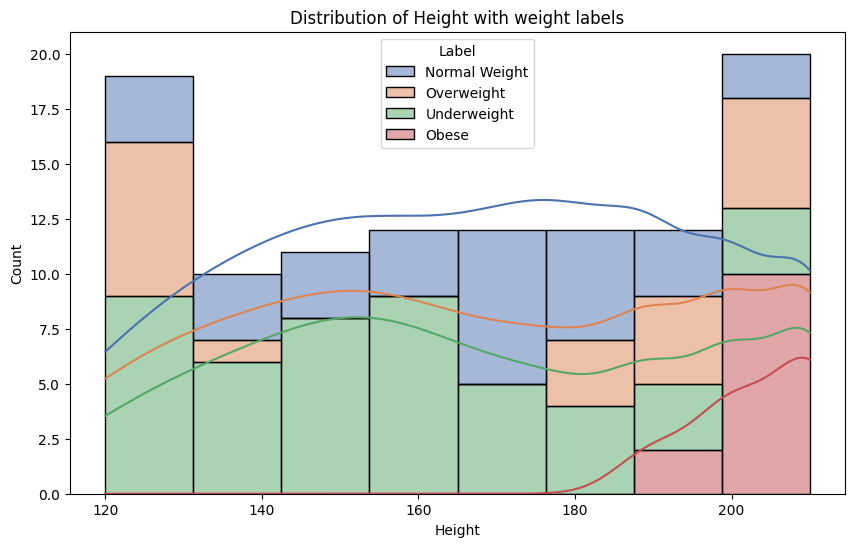

In [22]:
plt.figure(figsize=(10,6),dpi=100)
sns.histplot(data=df,x='Height',kde=True,hue='Label',multiple='stack',palette='deep')
plt.title('Distribution of Height with weight labels');

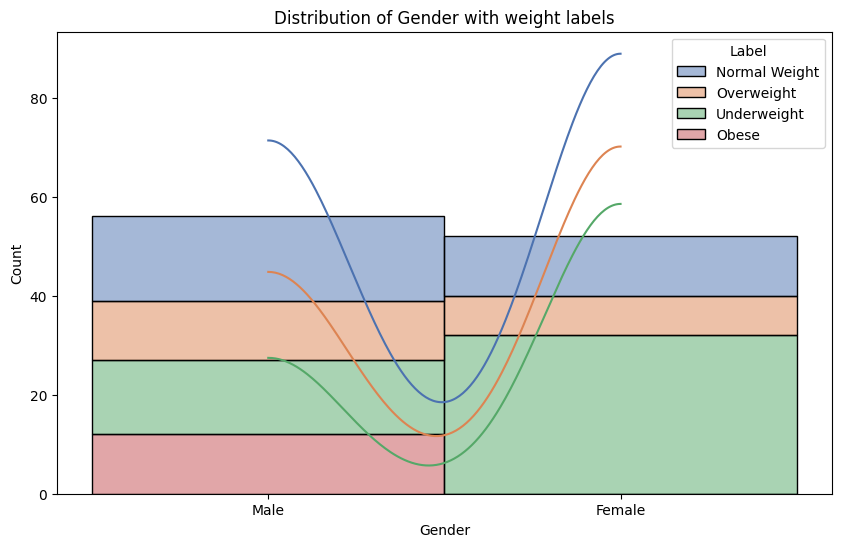

In [23]:
plt.figure(figsize=(10,6),dpi=100)
sns.histplot(data=df,x='Gender',kde=True,hue='Label',multiple='stack',palette='deep')
plt.title('Distribution of Gender with weight labels');

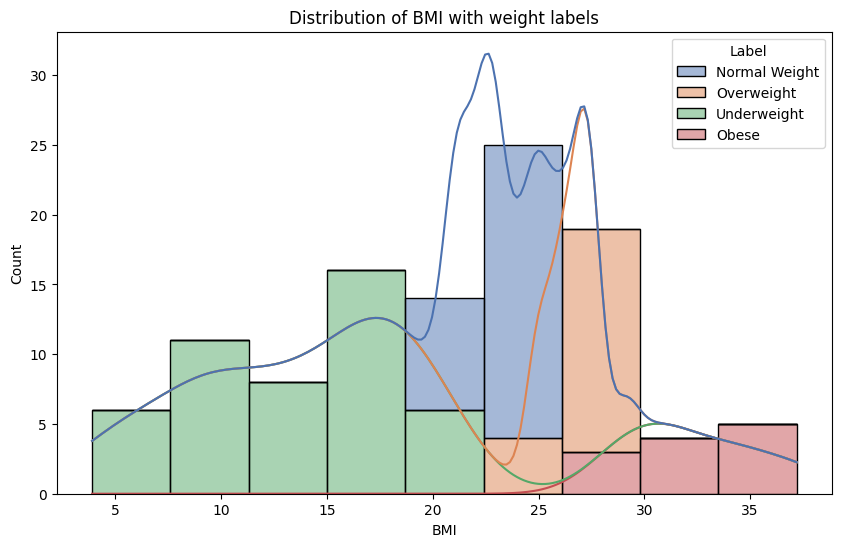

In [24]:
plt.figure(figsize=(10,6),dpi=100)
sns.histplot(data=df,x='BMI',kde=True,hue='Label',multiple='stack',palette='deep')
plt.title('Distribution of BMI with weight labels');

Saya akan melihat korelasi kolom dengan label yang dimana saya harus mengubah type object menjadi type numerik terlebih dahulu

In [25]:
df=df.replace({'Gender':{'Male': 1, 'Female': 2}})

In [26]:
df=df.replace({'Label':{'Underweight': 1, 'Normal Weight': 2, 'Overweight': 3, 'Obese': 4}})

<Axes: >

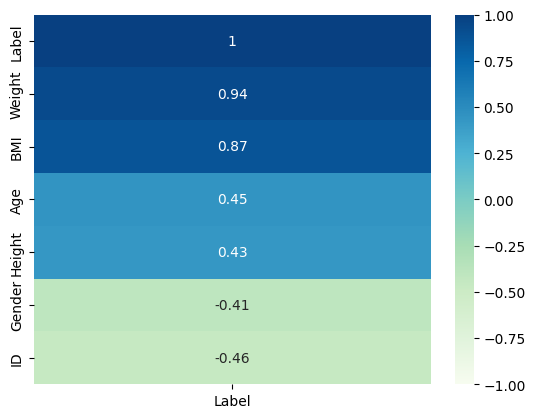

In [27]:
sns.heatmap(df.corr()[['Label']].sort_values(by='Label', ascending=False), vmin=-1, vmax=1, annot=True, cmap='GnBu')

# Preprocessing

In [28]:
df.drop(labels='ID',axis=1,inplace=True)

# modeling

In [29]:
X = df.drop('Label', axis=1)
y = df['Label']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)

    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [31]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [32]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 96.96969696969697 % and k = [5]


In [33]:
knn = KNeighborsClassifier(5)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9696969696969697

# Visualisasi hasil algoritma

In [34]:
y_pred = knn.predict(X_test)

input_data = (25,1,175,80,25)

input_data_as_numpy_array = np.array(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = knn.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Kekurangan Berat Badan')
elif (prediction[0] == 2):
        print('Berat Badan Normal')
elif (prediction[0] == 3):
        print('Kelebihan Berat Badan')
else:
  print('Obesitas')

[2]
Berat Badan Normal


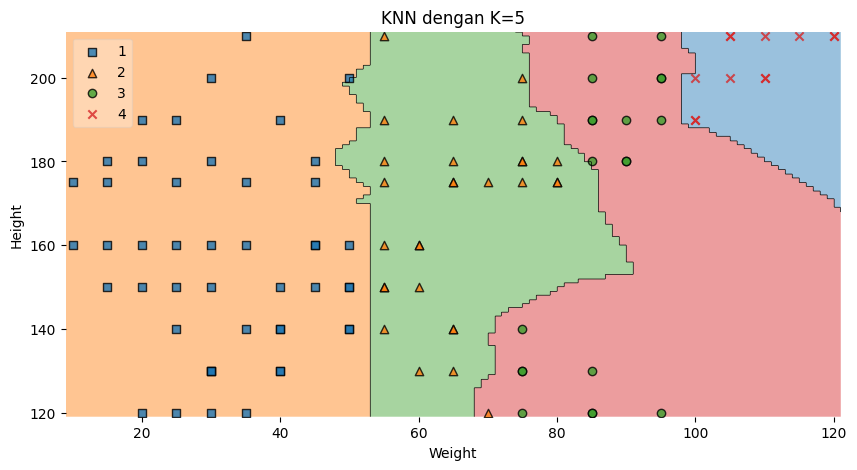

In [35]:
fig, ax = plt.subplots(figsize=(10, 5))
x = df[['Weight', 'Height']].values
y = df['Label'].astype(int).values
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(x, y)

plot_decision_regions(x, y, clf=clf, legend=2, ax=ax)
ax.set_xlabel('Weight')
ax.set_ylabel('Height')
ax.set_title('Knn dengan K=5')
plt.show()

# save model (pickle)

In [36]:
filename = 'Obesity Classification.pkl'
with open(filename, 'wb') as file:
    pickle.dump(knn, file)

In [37]:
filename = 'model.sav'
pickle.dump(knn, open(filename, 'wb'))

# Evaluasi

Text(0.5, 23.52222222222222, 'Predicted label')

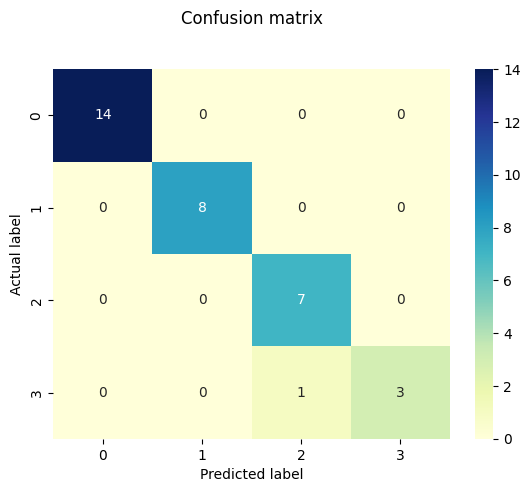

In [38]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8
           3       0.88      1.00      0.93         7
           4       1.00      0.75      0.86         4

    accuracy                           0.97        33
   macro avg       0.97      0.94      0.95        33
weighted avg       0.97      0.97      0.97        33

